### Part 1

We start by importing relevant packages and reading the data.

In [79]:
import numpy as np
import pandas as pd

In [80]:
# Read the features file
features_df = pd.read_csv("/Users/anthonodengard/skolarbete/MPCAS/MVE441/Project_1/TCGAdata.txt", sep=" ")

# Read the labels file
labels_df = pd.read_csv("/Users/anthonodengard/skolarbete/MPCAS/MVE441/Project_1/TCGAlabels", sep=" ")

# Merge the two DataFrames on index
merged_df = pd.merge(features_df, labels_df, left_index=True, right_index=True)


In [81]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


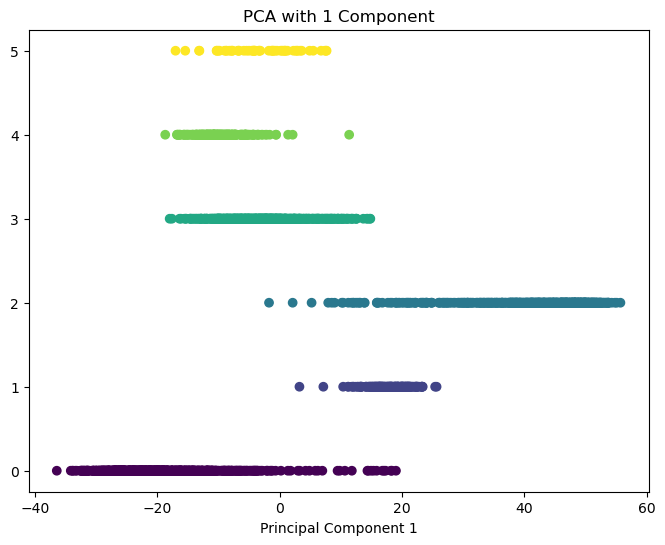

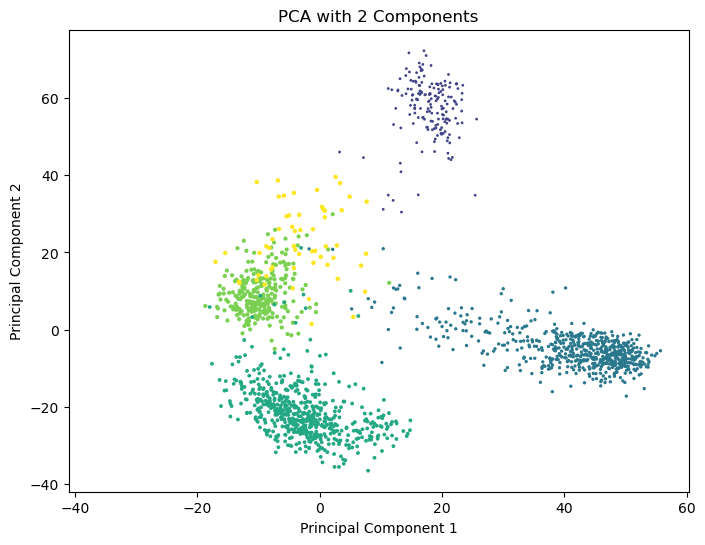

/usr/local/anaconda3/lib/python3.11/site-packages/mpl_toolkits/mplot3d/art3d.py:1110: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/anaconda3/lib/python3.11/site-packages/mpl_toolkits/mplot3d/art3d.py:1112: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


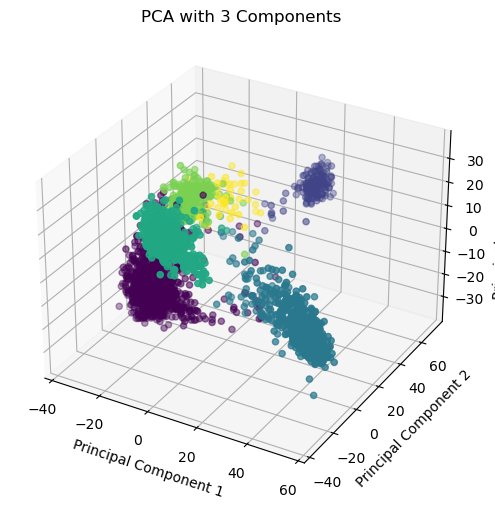

In [82]:

X = StandardScaler().fit_transform(X)
Y = LabelEncoder().fit_transform(labels_df)




for n_components in [1,2,3]:
    
    pca = PCA(n_components=n_components)
    
    # Fit the model
    X_pca = pca.fit_transform(X)
    
    # Plot
    
    if n_components == 1:
        plt.figure(figsize=(8,6))
        plt.scatter(X_pca[:, 0], Y, c = Y, cmap="viridis")
        plt.xlabel('Principal Component 1')
        plt.title('PCA with 1 Component')
        plt.show()

    elif n_components == 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], Y,  c = Y, cmap='viridis')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA with 2 Components')
        plt.show()
    elif n_components == 3:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], Y, c=Y, cmap='viridis')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        plt.title('PCA with 3 Components')
        plt.show()
    

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate

In [84]:
# Initiate classifiers

KNN_classifier = KNeighborsClassifier(n_neighbors=5)
logistic_regression_classifier = LogisticRegression()
LDA_classifier = LinearDiscriminantAnalysis()

n_components_range = range(1,10)
for n_components in n_components_range:
    n_range_length = len(n_components_range)
    cross_validation_KNN = np.array(n_range_length)
    cross_validation_lin_reg = np.array(n_range_length)
    cross_validation_LDA = np.array(n_range_length)
    
    pca = PCA(n_components=n_components)
    
    # Fit the model
    X_pca = pca.fit_transform(X)
    
    cross_validation_KNN[n_components-1] = np.mean(cross_validate(KNN_classifier, X,Y, scoring="accuracy"))



/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/anaconda3/lib/python3.11/site-

TypeError: unsupported operand type(s) for /: 'dict' and 'int'